In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [22]:
# Generate a sample dataset
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 2 * X[:, 0] + 3 * X[:, 1] - 4 * X[:, 2] + np.random.rand(100)

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter for strength of regularization



In [26]:
# Fit the model to the training data
ridge.fit(X_train, y_train)

Ridge()

In [27]:
# Make predictions
y_pred = ridge.predict(X_test)

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.2055509226807611


In [29]:
import matplotlib.pyplot as plt

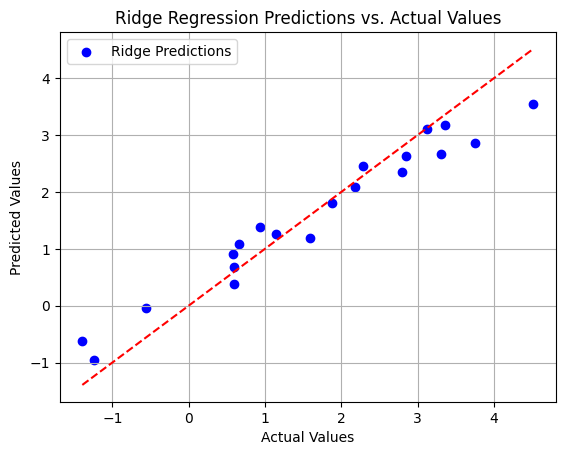

In [31]:
plt.scatter(y_test, y_pred, c='blue', label='Ridge Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Ridge Regression Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [36]:
alphas = np.arange(0.1, 1.1, 0.1)
mse_val = []
for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)

    y_pridict = ridge.predict(X_test)
    mse = mean_squared_error(y_test,y_pridict)
    mse_val.append(mse)



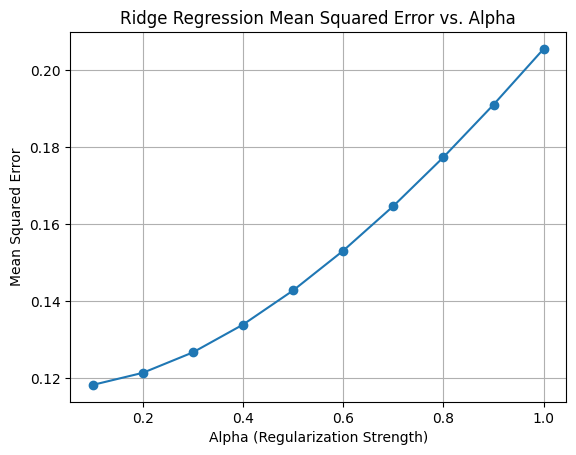

In [37]:
plt.plot(alphas, mse_val, marker='o')
plt.title('Ridge Regression Mean Squared Error vs. Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()

# Laso 

Mean Squared Error: 1.4255041732755835


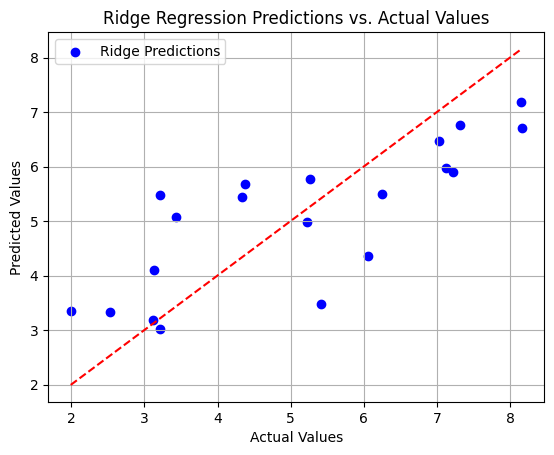

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate a sample dataset
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 5 * X[:, 0] + 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust the alpha parameter for strength of regularization

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred, c='blue', label='Ridge Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Ridge Regression Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


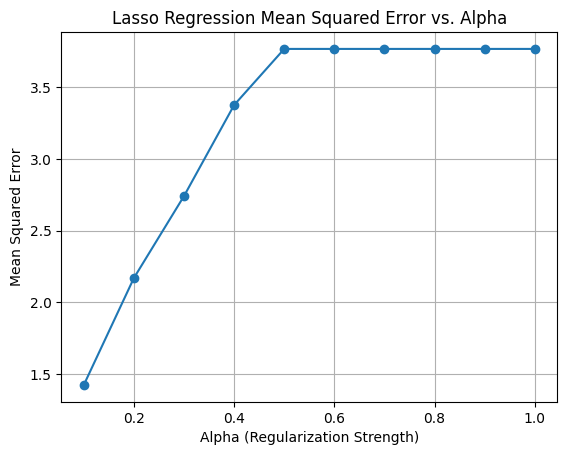

In [41]:
alphas = np.arange(0.1, 1.1, 0.1)
mse_val = []
for alpha in alphas :
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)

    y_pridict = lasso.predict(X_test)
    mse = mean_squared_error(y_test,y_pridict)
    mse_val.append(mse)

# ploat 

plt.plot(alphas, mse_val, marker='o')
plt.title('Lasso Regression Mean Squared Error vs. Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()

# To find Best Alpha 

In [12]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate some example data
np.random.seed(0)
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] - 4 * X[:, 2] + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to search through
alphas = np.logspace(start=-10 , stop=0 , base=10, num=20)

# Create a Ridge regression model
ridge = Ridge()

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Create the GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Create a Ridge model with the best alpha value
best_ridge = Ridge(alpha=best_alpha)

# Fit the best model to the training data
best_ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_ridge.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error with Best Alpha: {mse}')

Best Alpha: 1e-10
Mean Squared Error with Best Alpha: 0.8121631051532958
